## The Data Analytics Pipeline

Congratulations on making it this far! By this time, you already have some solid skills on the foundations of both Pandas and Numpy, you are now ready to visualize data!In the coming sessions, I will be taking you through the typical data analytics pipeline,from preparing data for analysis to creating awesome visualizations!

This is a brief summary of the typical data analytics pipeline:

**1. Data cleaning**
- Handling duplicates
- Handling datatype mismatches 
- Handling missingness  
- Handling outliers

**2. Univariate analysis**

**3. Bivariate analysis**

**4. Multivariate analysis**



In [26]:
#import necessary libraries

import pandas as pd
import numpy as np


In [27]:
df=pd.read_excel(r'C:\Users\Wambui\Desktop\Python_Data_Analysis\dataset\train.xlsx')
df.head()

,ID,date,Meals served,kitchen_staff,temperature_C,humidity_percent,Day of the week,special_event,past_waste_kg,staff_experience,WASTE CATEGORY,food_waste_kg
0,0,19/12/2022,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy,28.946465336432905 kg
1,1,21/11/2023,244,15,10.317872,64.430475,1,0,42.311779,NaN,NaN,51.54905281454645 kg
2,4,2022-01-02 00:00:00,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt,53.008322732556536 kg
3,5,19/03/2023,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt,48.62152711280995 kg
4,6,18/07/2022,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT,44.15698435866615 kg


#### 1. Handling Data type inconsistencies

In [28]:
df.dtypes

ID                    int64
date                 object
Meals served          int64
kitchen_staff         int64
temperature_C       float64
humidity_percent    float64
Day of the week       int64
special_event         int64
past_waste_kg       float64
staff_experience     object
WASTE CATEGORY       object
food_waste_kg        object
dtype: object

In [29]:
df['food_waste_kg']=df['food_waste_kg'].str.replace('kg','').astype(float)
df['food_waste_kg'].dtype

dtype('float64')

In [30]:
df['WASTE CATEGORY']=df['WASTE CATEGORY'].str.lower()

df.head()

,ID,date,Meals served,kitchen_staff,temperature_C,humidity_percent,Day of the week,special_event,past_waste_kg,staff_experience,WASTE CATEGORY,food_waste_kg
0,0,19/12/2022,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy,28.946465
1,1,21/11/2023,244,15,10.317872,64.430475,1,0,42.311779,NaN,NaN,51.549053
2,4,2022-01-02 00:00:00,148,16,27.714300,69.046113,1,0,41.184305,Beginner,meat,53.008323
3,5,19/03/2023,157,19,19.173902,46.292823,6,0,41.543492,Beginner,meat,48.621527
4,6,18/07/2022,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,meat,44.156984


In [32]:
df['staff_experience']=df['staff_experience'].str.lower()
df.head()

,ID,date,Meals served,kitchen_staff,temperature_C,humidity_percent,Day of the week,special_event,past_waste_kg,staff_experience,WASTE CATEGORY,food_waste_kg
0,0,19/12/2022,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy,28.946465
1,1,21/11/2023,244,15,10.317872,64.430475,1,0,42.311779,NaN,NaN,51.549053
2,4,2022-01-02 00:00:00,148,16,27.714300,69.046113,1,0,41.184305,beginner,meat,53.008323
3,5,19/03/2023,157,19,19.173902,46.292823,6,0,41.543492,beginner,meat,48.621527
4,6,18/07/2022,297,10,26.375233,79.741064,0,0,26.525097,intermediate,meat,44.156984


In [33]:
df.columns

Index(['ID', 'date', 'Meals served', 'kitchen_staff', 'temperature_C',
       'humidity_percent', 'Day of the week', 'special_event', 'past_waste_kg',
       'staff_experience', 'WASTE CATEGORY', 'food_waste_kg'],
      dtype='object')

In [34]:
#renaming columns
df.rename(columns={
    'Meals served':'meals_served',
    'Day of the week':'day_of_the_week',
    'WASTE CATEGORY':'waste_category'
},inplace=True)

In [35]:
df.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_the_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
0,0,19/12/2022,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy,28.946465
1,1,21/11/2023,244,15,10.317872,64.430475,1,0,42.311779,NaN,NaN,51.549053
2,4,2022-01-02 00:00:00,148,16,27.714300,69.046113,1,0,41.184305,beginner,meat,53.008323
3,5,19/03/2023,157,19,19.173902,46.292823,6,0,41.543492,beginner,meat,48.621527
4,6,18/07/2022,297,10,26.375233,79.741064,0,0,26.525097,intermediate,meat,44.156984


### 2. Handling duplicates

In [37]:
#duplicated()
df.duplicated().value_counts()

False    911
True       3
Name: count, dtype: int64

In [38]:
df[df.duplicated()]

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_the_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
911,6,18/07/2022,297,10,26.375233,79.741064,0,0,26.525097,intermediate,meat,44.156984
912,1037,13/08/2024,338,17,30.509438,79.102174,1,0,43.168167,intermediate,meat,48.366657
913,1000,16/06/2024,372,17,31.549673,65.721580,6,0,38.747916,intermediate,meat,49.347465


In [40]:
print(df.shape)
print('-'*7)
df_clean=df.drop_duplicates() # by default, drop.duplicates(), will keep the first instance
#df_clean=df.drop_duplicates(keep='last')
print(df_clean.shape)

(914, 12)
-------
(911, 12)


### 3. Handling Missingness

- Identify the missingness -where?
- Quantify the missingness - how much of it, what is the extent?
- Determine the type of missingness!
- The methods of handling missingness

In [48]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 911 entries, 0 to 910
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                911 non-null    int64  
 1   date              911 non-null    object 
 2   meals_served      911 non-null    int64  
 3   kitchen_staff     911 non-null    int64  
 4   temperature_C     911 non-null    float64
 5   humidity_percent  909 non-null    float64
 6   day_of_the_week   911 non-null    int64  
 7   special_event     911 non-null    int64  
 8   past_waste_kg     911 non-null    float64
 9   staff_experience  747 non-null    object 
 10  waste_category    892 non-null    object 
 11  food_waste_kg     911 non-null    float64
dtypes: float64(4), int64(5), object(3)
memory usage: 92.5+ KB


In [49]:
#ways to identify missingness

df_clean.isnull().sum()

ID                    0
date                  0
meals_served          0
kitchen_staff         0
temperature_C         0
humidity_percent      2
day_of_the_week       0
special_event         0
past_waste_kg         0
staff_experience    164
waste_category       19
food_waste_kg         0
dtype: int64

In [50]:
df_clean.notnull()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_the_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
0,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,False,False,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
906,True,True,True,True,True,True,True,True,True,True,False,True
907,True,True,True,True,True,True,True,True,True,True,True,True
908,True,True,True,True,True,True,True,True,True,True,True,True
909,True,True,True,True,True,True,True,True,True,True,True,True


In [51]:
#quantifying missingness
total_missing=df_clean.isnull().sum()
total_values=df_clean.isnull().count()

percent_missing=total_missing/total_values
percent_missing*100

ID                   0.000000
date                 0.000000
meals_served         0.000000
kitchen_staff        0.000000
temperature_C        0.000000
humidity_percent     0.219539
day_of_the_week      0.000000
special_event        0.000000
past_waste_kg        0.000000
staff_experience    18.002195
waste_category       2.085620
food_waste_kg        0.000000
dtype: float64

<Axes: >

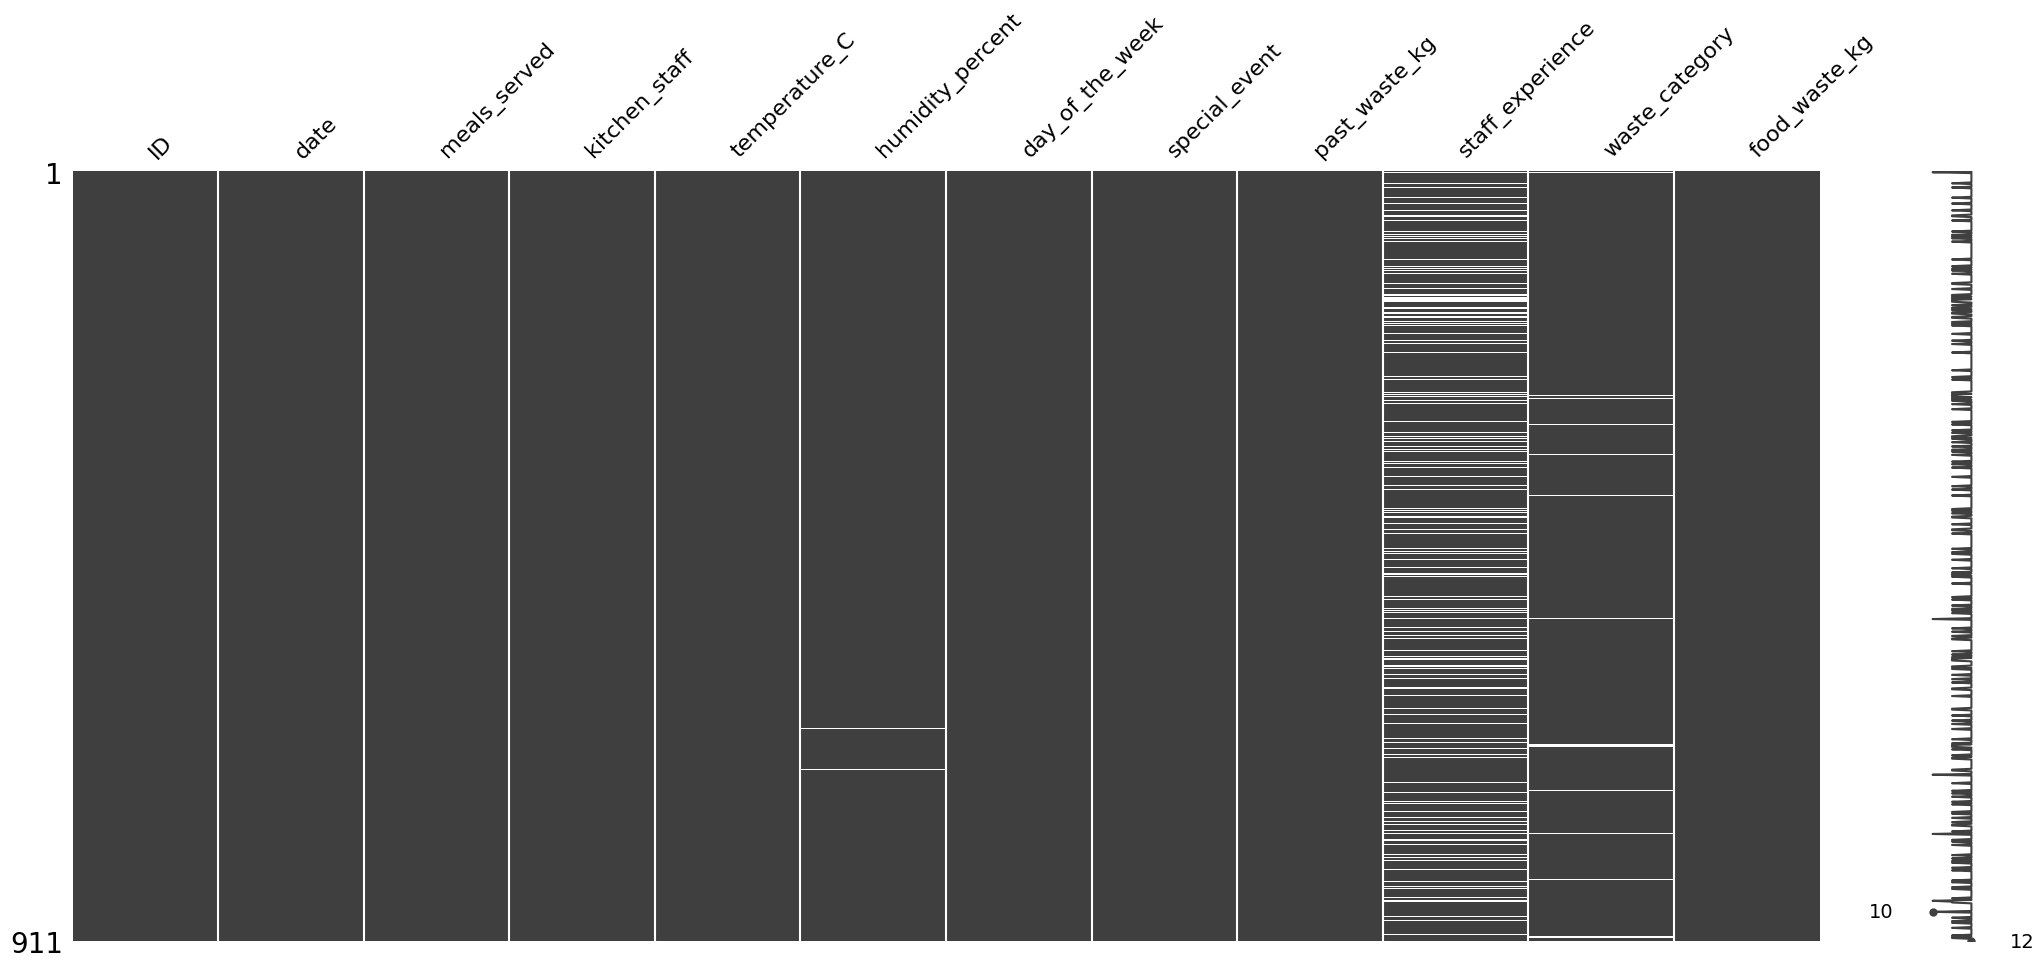

In [52]:
import missingno as mn

mn.matrix(df_clean)

### Types of Missingness

**1. Missing Completely at Random (MCAR)**
The value missing has nothing to do with any variables in your data, it is just randomly missing. There is no pattern to the missingness.


**2. Missing at Random (MAR)**
Here, the missingness can be explained by other variables in your data. There is a pattern to why that value is missing.


**3. Missing  Not at Random (MNAR)**
The value is missing, because of the value itself. Even when you have all the other variables, you cannot identify a pattern as to why it is missing.


In [ ]:
#drop all missing values
#df.dropna(inplace=True)

In [54]:
#imputation- filling in the null values with another value
#BEST approach- impute with mean, median, mode
#df.fillna(9,inplace=True)

df_clean['humidity_percent'].fillna((df_clean['humidity_percent'].mean()),inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 911 entries, 0 to 910
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                911 non-null    int64  
 1   date              911 non-null    object 
 2   meals_served      911 non-null    int64  
 3   kitchen_staff     911 non-null    int64  
 4   temperature_C     911 non-null    float64
 5   humidity_percent  911 non-null    float64
 6   day_of_the_week   911 non-null    int64  
 7   special_event     911 non-null    int64  
 8   past_waste_kg     911 non-null    float64
 9   staff_experience  747 non-null    object 
 10  waste_category    892 non-null    object 
 11  food_waste_kg     911 non-null    float64
dtypes: float64(4), int64(5), object(3)
memory usage: 92.5+ KB


C:\Users\Wambui\AppData\Local\Temp\ipykernel_11308\944274151.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['humidity_percent'].fillna((df_clean['humidity_percent'].mean()),inplace=True)
C:\Users\Wambui\AppData\Local\Temp\ipykernel_11308\944274151.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['humidity_percent'].fi

In [56]:
df_clean['waste_category'].fillna((df_clean['waste_category'].mode()[0]),inplace=True)

C:\Users\Wambui\AppData\Local\Temp\ipykernel_11308\3813058345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['waste_category'].fillna((df_clean['waste_category'].mode()[0]),inplace=True)


In [59]:
df_clean['staff_experience'].fillna((df_clean['staff_experience'].mode()[0]),inplace=True)

C:\Users\Wambui\AppData\Local\Temp\ipykernel_11308\3689265351.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['staff_experience'].fillna((df_clean['staff_experience'].mode()[0]),inplace=True)
C:\Users\Wambui\AppData\Local\Temp\ipykernel_11308\3689265351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['staff_experience

In [60]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 911 entries, 0 to 910
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                911 non-null    int64  
 1   date              911 non-null    object 
 2   meals_served      911 non-null    int64  
 3   kitchen_staff     911 non-null    int64  
 4   temperature_C     911 non-null    float64
 5   humidity_percent  911 non-null    float64
 6   day_of_the_week   911 non-null    int64  
 7   special_event     911 non-null    int64  
 8   past_waste_kg     911 non-null    float64
 9   staff_experience  911 non-null    object 
 10  waste_category    911 non-null    object 
 11  food_waste_kg     911 non-null    float64
dtypes: float64(4), int64(5), object(3)
memory usage: 92.5+ KB


In [61]:
df_clean.isnull().sum()

ID                  0
date                0
meals_served        0
kitchen_staff       0
temperature_C       0
humidity_percent    0
day_of_the_week     0
special_event       0
past_waste_kg       0
staff_experience    0
waste_category      0
food_waste_kg       0
dtype: int64

### 4. Handling outliers

In [62]:
numeric_cols=df_clean.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['ID',
 'meals_served',
 'kitchen_staff',
 'temperature_C',
 'humidity_percent',
 'day_of_the_week',
 'special_event',
 'past_waste_kg',
 'food_waste_kg']

In [64]:
num_df=df_clean[numeric_cols]
num_df

,ID,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_the_week,special_event,past_waste_kg,food_waste_kg
0,0,196,13,27.887273,45.362854,0,0,7.740587,28.946465
1,1,244,15,10.317872,64.430475,1,0,42.311779,51.549053
2,4,148,16,27.714300,69.046113,1,0,41.184305,53.008323
3,5,157,19,19.173902,46.292823,6,0,41.543492,48.621527
4,6,297,10,26.375233,79.741064,0,0,26.525097,44.156984
...,...,...,...,...,...,...,...,...,...
906,1044,395,18,17.354199,45.138435,1,0,40.550668,50.369152
907,1045,483,11,24.912137,59.485091,6,0,36.470276,43.070121
908,1046,243,11,28.870945,70.508404,2,0,19.767203,29.632560
909,1048,406,10,19.061638,55.286642,0,0,28.560361,44.615759


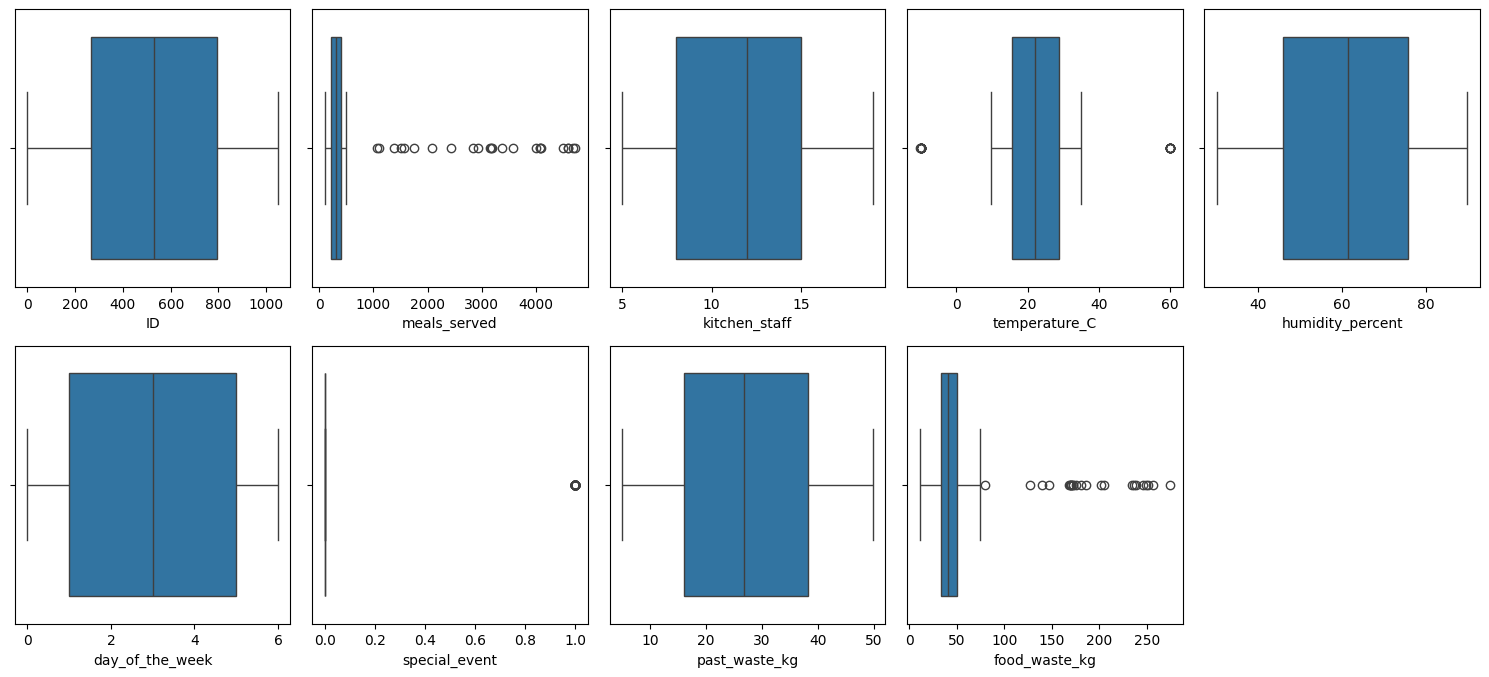

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(15,30))
for i in range(len(numeric_cols)):
    ax=fig.add_subplot(9,5,i+1)
    sns.boxplot(x=num_df.iloc[:,i],ax=ax)

plt.tight_layout()
plt.show()

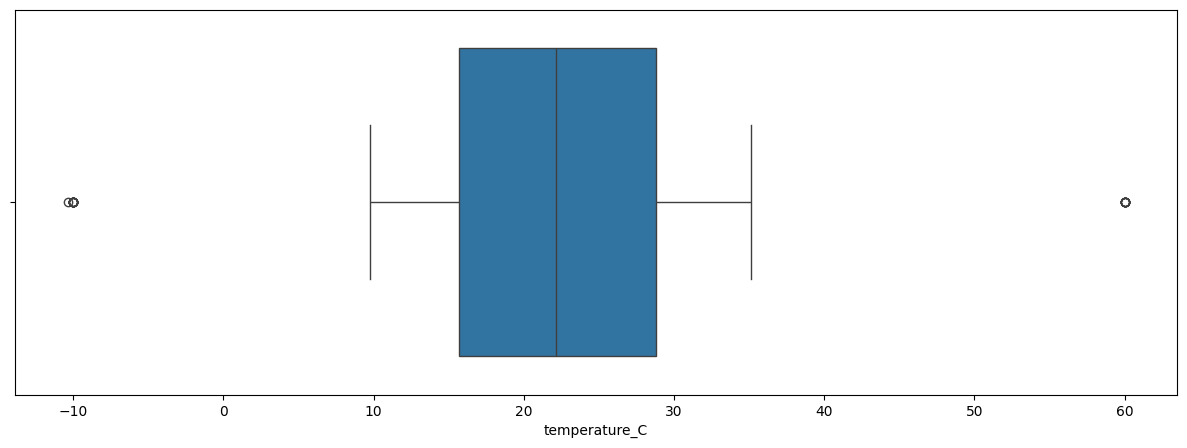

In [67]:
plt.figure(figsize=(15,5))
sns.boxplot(x='temperature_C',data=num_df)

plt.show()

In [71]:
Q1=np.quantile(num_df['temperature_C'],0.25)
Q3=np.quantile(num_df['temperature_C'],0.75)
IQR=Q3-Q1

lower_range=Q1-(1.5*IQR)
upper_range=Q3+(1.5*IQR)

print(lower_range)
print(upper_range)

-3.9949789699304024
48.4838581484664


In [75]:
df_clean.shape

(911, 12)

In [77]:
final_df=df_clean[(df_clean['temperature_C']>=lower_range) & (df_clean['temperature_C']<=upper_range)]
final_df.shape

(889, 12)